# Introduction

Load C1 Data into AnnData / scanpy matrix

In [1]:
import anndata
import numpy
import os
import pandas
import scanpy
import itertools

from woldrnaseq.models import (
    load_library_tables,
    load_experiments,
    load_quantifications,
)
from woldrnaseq.gtfcache import load_gtf_cache
from woldrnaseq.madqc import (
    load_genomic_quantifications
)

/usr/lib/python3/dist-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
quantification = 'expected_count'

In [3]:
gtf = load_gtf_cache(os.path.expanduser('~/proj/genome/mm10-M4-male/mm10-M4-male.h5'))
genes = gtf[gtf['type'] == 'gene'].set_index('gene_id')


In [4]:
libraries = load_library_tables(['paper_analysis_vdir/library_vdir.tsv'])
experiment_time = load_experiments(['paper_analysis_vdir/experiment_time.tsv'])
experiment_cluster = load_experiments(['paper_analysis_vdir/experiment_cluster.tsv'])

In [5]:
replicates = list(itertools.chain(*experiment_time['replicates'].values))

In [6]:
experiment_all = pandas.Series({
    'replicates': replicates, 
    'analysis_dir': experiment_time.loc['C1_e10.5_mouse_forelimb', 'analysis_dir']})

In [7]:
experiment_all

replicates      [17327_A10, 17327_A11, 17327_A12, 17327_A2, 17...
analysis_dir    /woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
dtype: object

In [8]:
X = load_genomic_quantifications(experiment_all, libraries, quantification).T

quantifications None (69690, 920)


In [9]:
ad = anndata.AnnData(X)

In [10]:
ad.obs['cell_id'] = X.index

In [11]:
ad.var['gene_id'] = X.columns

In [12]:
ad.var['gene_name'] = genes.reindex(X.columns.values)['gene_name']

In [13]:
library_time = {}
for experiment_name, row in experiment_time.iterrows():
    for replicate in row.replicates:
        library_time[replicate] = experiment_name.split('_')[1]

In [14]:
ad.obs['day'] = library_time

In [15]:
library_cluster = {}
for experiment_name, row in experiment_cluster.iterrows():
    for replicate in row.replicates:
        library_cluster[replicate] = experiment_name

In [16]:
ad.obs['CellType'] = library_cluster

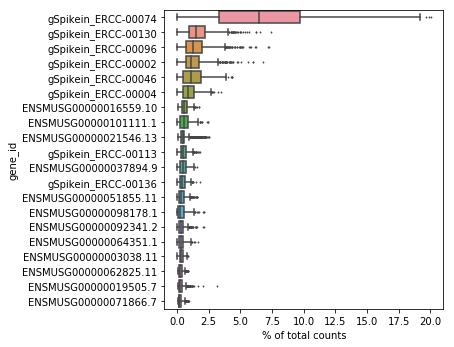

In [17]:
scanpy.pl.highest_expr_genes(ad, n_top=20)

In [18]:
ad.write_h5ad('paper_analysis_vdir/C1_mouse_forelimb_{}.h5ad'.format(quantification))

... storing 'gene_name' as categorical
